Model (One-hot only)
MSE: 0.10845911501065057
R²: 0.548087020788956


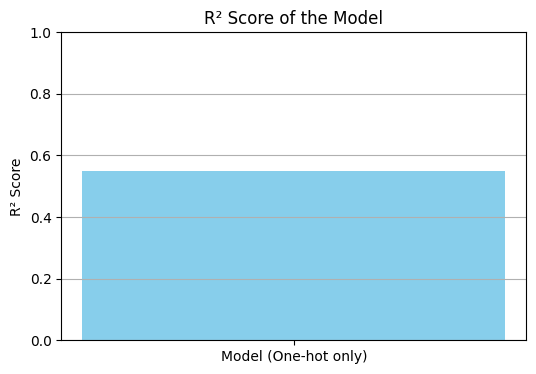

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


#importing the UCI data for Cleveland only
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]  #target is the presence of heart disease. 0 is none, 1-4 is severity.
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", names=column_names, na_values="?")

#gets the 3 params of interest
df = df[["cp", "ca", "thal", "target"]]

#removing rows with missing data
df = df.dropna() #removed 6 rows with missing data--should be pretty inconsequential

#makes heart disease a binary outcome
df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

#one hot encoding the data
df_encoded = pd.get_dummies(df, columns=['cp', 'ca', 'thal'])
df_encoded.astype(int)
df = df_encoded

X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Set your hyperparameters
model_type = 'ridge'      # Choose from: 'ridge' (L2), 'lasso' (L1)
alpha = 1.0               # Regularization strength (acts like learning rate)

# Select model
if model_type == 'ridge':
    model1 = Ridge(alpha=alpha)
    model2 = Ridge(alpha=alpha)
elif model_type == 'lasso':
    model1 = Lasso(alpha=alpha, max_iter=10000)
    model2 = Lasso(alpha=alpha, max_iter=10000)
else:
    raise ValueError("Unsupported model type. Choose 'ridge', 'lasso', or 'elasticnet'.")

# Fit and predict
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print results
print("Model (One-hot only)")
print("MSE:", mse)
print("R²:", r2)

# Optional: plot R² as a single point or bar
plt.figure(figsize=(6, 4))
plt.bar(['Model (One-hot only)'], [r2], color='skyblue')
plt.ylim(0, 1)
plt.title('R² Score of the Model')
plt.ylabel('R² Score')
plt.grid(True, axis='y')
plt.show()
